This notebook shows an example of how to calculate the similarity between two sets of SMILES

In [1]:
import os
import sys

# get the current script's directory
current_dir = os.path.abspath('')

# get the parent directory by going one level up
parent_dir = os.path.dirname(current_dir)

# add the parent directory to sys.path
sys.path.append(parent_dir)

In [2]:
import numpy as np
import pandas as pd

from rdkit import Chem
from rdkit.Chem import AllChem

from cheminformatics_similarity.get_similarity import get_similarity_matrix

In [3]:
df_esol = pd.read_csv('data/ESOL/delaney.csv')
df_esol

,smiles,logSolubility
0,OCC3OC(OCC2OC(OC(C#N)c1ccccc1)C(O)C(O)C2O)C(O)...,-0.770
1,Cc1occc1C(=O)Nc2ccccc2,-3.300
2,CC(C)=CCCC(C)=CC(=O),-2.060
3,c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43,-7.870
4,c1ccsc1,-1.330
...,...,...
1123,FC(F)(F)C(Cl)Br,-1.710
1124,CNC(=O)ON=C(SC)C(=O)N(C)C,0.106
1125,CCSCCSP(=S)(OC)OC,-3.091
1126,CCC(C)C,-3.180


In [4]:
df_esol['inchi_key'] = df_esol.smiles.apply(lambda x: Chem.inchi.MolToInchiKey(Chem.MolFromSmiles(x)) if Chem.MolFromSmiles(x) else 'Remove')

In [5]:
df_esol = df_esol.drop_duplicates(subset='inchi_key')
df_esol.shape

(1117, 3)

In [6]:
fp_gen = AllChem.GetRDKitFPGenerator(minPath=1, maxPath=4, fpSize=2048)

def get_RDKit_fp(smi):
	mol = Chem.MolFromSmiles(smi)
	return fp_gen.GetCountFingerprint(mol)

In [7]:
df_esol['fp'] = df_esol.smiles.apply(get_RDKit_fp)

/var/folders/rj/0m30fjwn4238jck4dfd1h5br0000gn/T/ipykernel_84509/145400063.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_esol['fp'] = df_esol.smiles.apply(get_RDKit_fp)


In [8]:
fp_list1 = list(df_esol.fp.values[:600])
fp_list2 = list(df_esol.fp.values[600:])

In [9]:
similarity_matrix = get_similarity_matrix(fp_list1, fp_list2, ncpus=2)
similarity_matrix.shape

[Parallel(n_jobs=2)]: Using backend MultiprocessingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  14 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 600 out of 600 | elapsed:    1.0s finished


(600, 517)

In [10]:
len(np.argwhere(similarity_matrix > 0.97))

33

In [11]:
smiles_list1 = df_esol.smiles.values[:600]
smiles_list2 = df_esol.smiles.values[600:]

****************************************************************************************
Smiles: c1ccc2c(c1)ccc3c2ccc4c5ccccc5ccc43


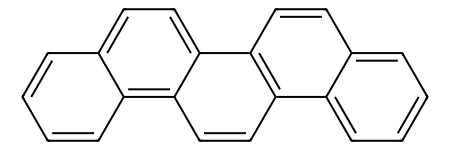

has similarity of 0.972 with
c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45


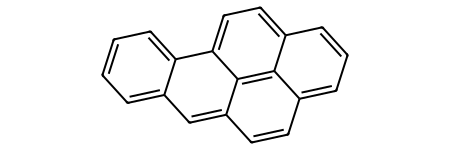

has similarity of 0.957 with
c1ccc2c(c1)c3cccc4ccc5cccc2c5c43


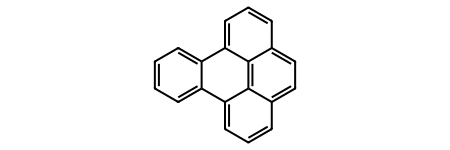

****************************************************************************************
Smiles: Clc1cccc(c1Cl)c2c(Cl)c(Cl)cc(Cl)c2Cl


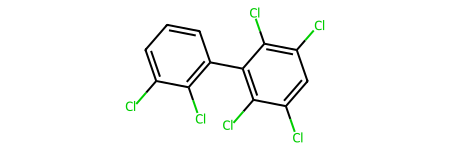

has similarity of 0.983 with
Clc1ccc(Cl)c(c1)c2c(Cl)c(Cl)cc(Cl)c2Cl


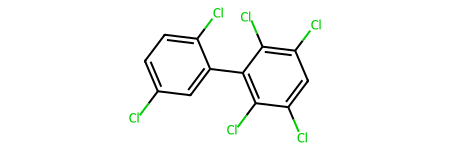

has similarity of 0.971 with
Clc1ccc(Cl)c(c1)c2cc(Cl)c(Cl)c(Cl)c2Cl


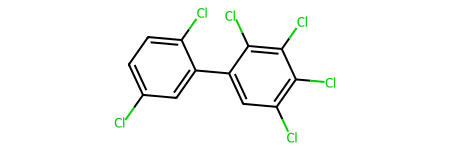

****************************************************************************************
Smiles: Cc1ccc(C)c2ccccc12


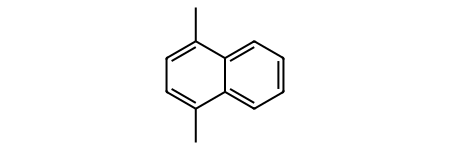

has similarity of 1.000 with
Cc1cccc2c(C)cccc12


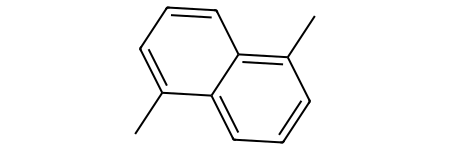

has similarity of 0.924 with
Cc1ccc2cc(C)ccc2c1


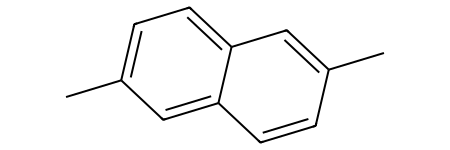

****************************************************************************************
Smiles: Cc1cc2c3ccccc3ccc2c4ccccc14


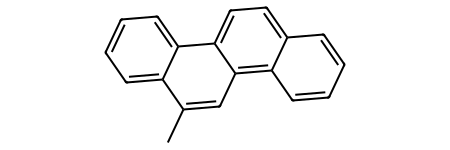

has similarity of 0.995 with
c1cccc2c3c(C)cc4ccccc4c3ccc12


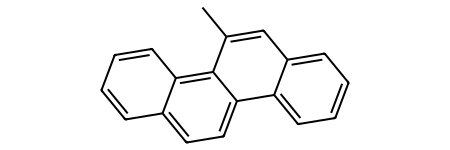

has similarity of 0.912 with
Cc1c(C)c2c3ccccc3ccc2c4ccccc14


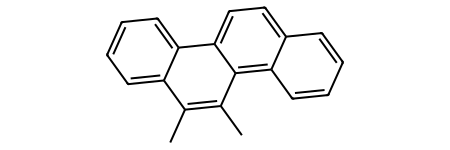

****************************************************************************************
Smiles: Clc1ccccc1c2ccccc2Cl


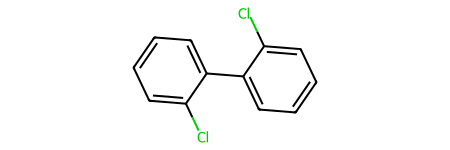

has similarity of 0.991 with
Clc1cccc(Cl)c1c2ccccc2


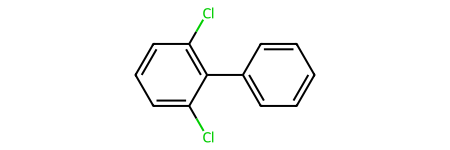

has similarity of 0.911 with
Clc1ccc(cc1)c2c(Cl)cccc2Cl


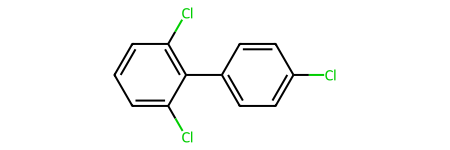

****************************************************************************************
Smiles: Clc1cccc(c1)c2cc(Cl)ccc2Cl


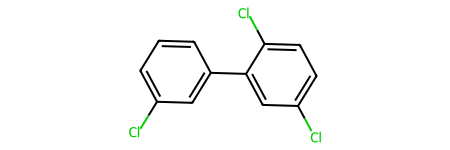

has similarity of 0.992 with
Clc1ccc(cc1)c2cc(Cl)ccc2Cl


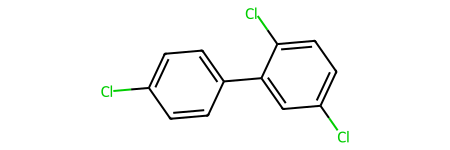

has similarity of 0.937 with
Clc1ccc(cc1)c2c(Cl)cccc2Cl


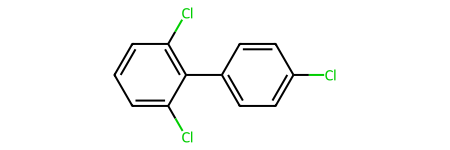

****************************************************************************************
Smiles: Clc1cccc(I)c1


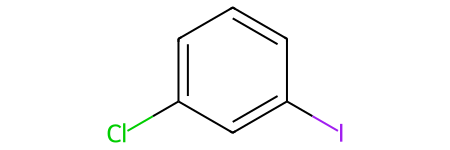

has similarity of 0.978 with
Clc1ccc(I)cc1


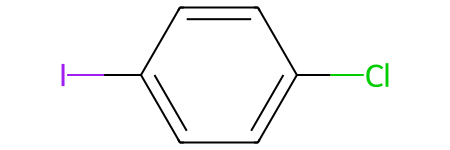

has similarity of 0.648 with
Nc1ccc(Cl)cc1


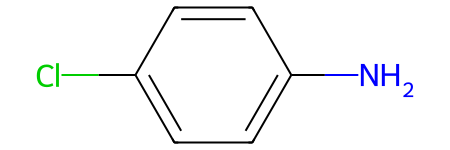

****************************************************************************************
Smiles: CC/C=C/C


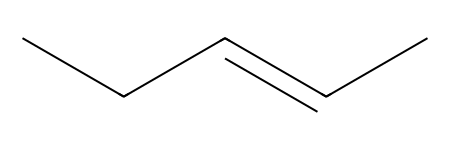

has similarity of 1.000 with
CC/C=C\C


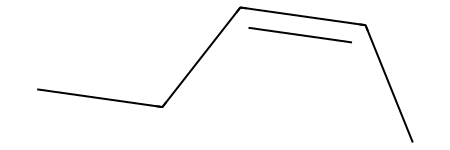

has similarity of 0.600 with
CCC=C


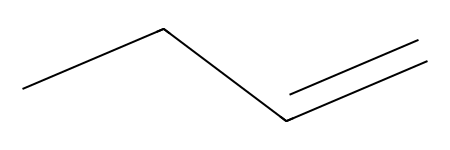

****************************************************************************************
Smiles: Oc1cccc(O)c1


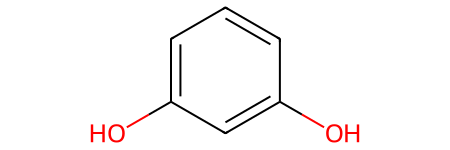

has similarity of 0.978 with
Oc1ccc(O)cc1


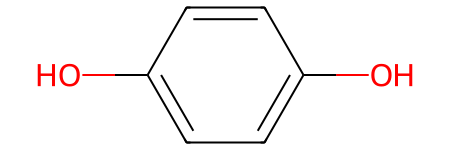

has similarity of 0.786 with
COc1ccccc1O


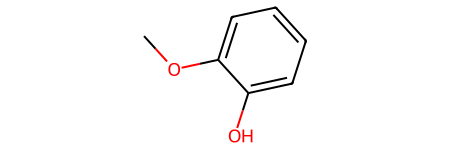

****************************************************************************************
Smiles: c1cc2cccc3c4cccc5cccc(c(c1)c23)c54


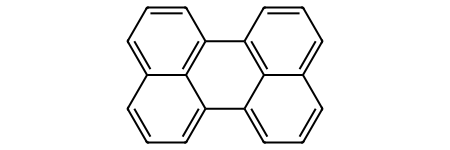

has similarity of 1.000 with
c1ccc2c(c1)c3cccc4ccc5cccc2c5c43


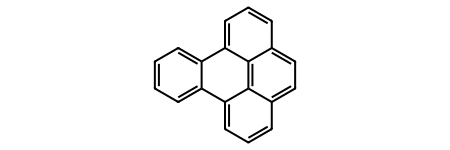

has similarity of 0.976 with
c1ccc2c(c1)cc3ccc4cccc5ccc2c3c45


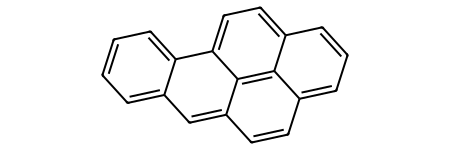

****************************************************************************************
Smiles: COc2cnc1ncncc1n2


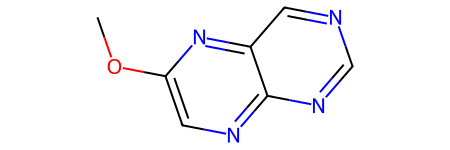

has similarity of 0.979 with
COc2cnc1cncnc1n2


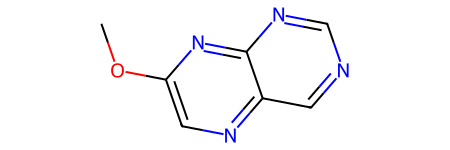

has similarity of 0.806 with
c2cnc1ncncc1n2


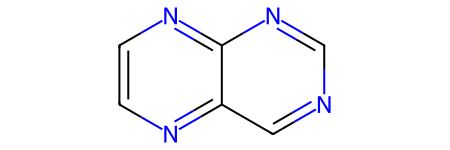

****************************************************************************************
Smiles: Oc1ccc(Cl)cc1


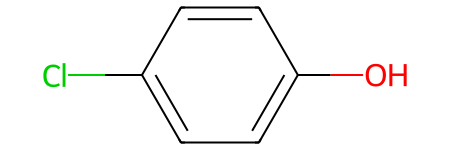

has similarity of 0.978 with
Oc1cccc(Cl)c1


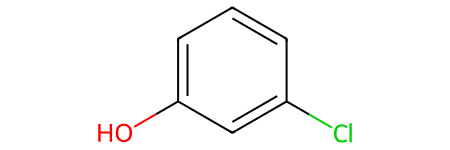

has similarity of 0.936 with
Oc1ccccc1Cl


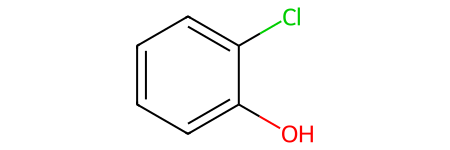

****************************************************************************************
Smiles: O=C1N(COC(=O)CCCC)C(=O)C(N1)(c2ccccc2)c3ccccc3


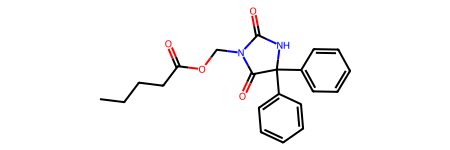

has similarity of 0.984 with
O=C1N(COC(=O)CCC)C(=O)C(N1)(c2ccccc2)c3ccccc3


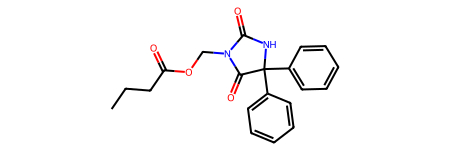

has similarity of 0.547 with
CN(C)C(=O)C(c1ccccc1)c2ccccc2


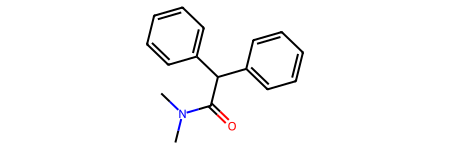

****************************************************************************************
Smiles: Cc1ccc2c(ccc3ccccc32)c1


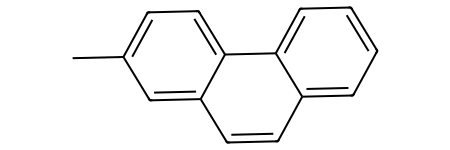

has similarity of 0.973 with
Cc1cccc2c1ccc3ccccc32


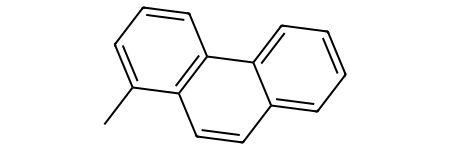

has similarity of 0.924 with
c1ccc2c(c1)ccc3ccccc32


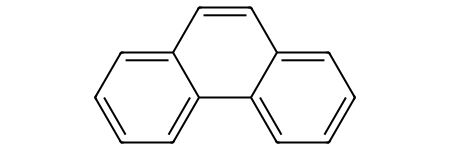

****************************************************************************************
Smiles: Clc1ccc(cc1)c2cccc(Cl)c2Cl


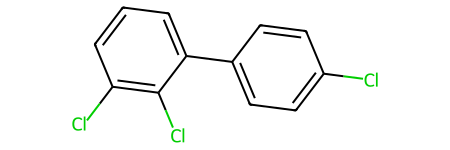

has similarity of 0.975 with
Clc1ccc(cc1)c2cc(Cl)ccc2Cl


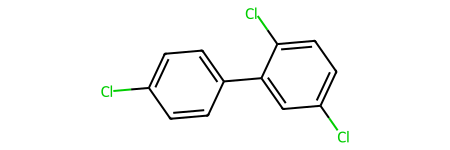

has similarity of 0.922 with
Clc1ccc(cc1)c2c(Cl)cccc2Cl


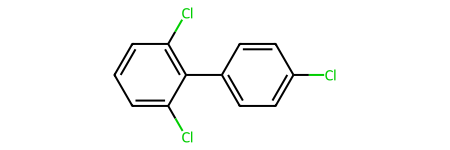

****************************************************************************************
Smiles: Nc1cccc(Cl)c1


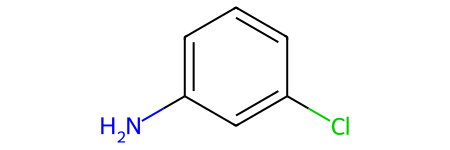

has similarity of 0.978 with
Nc1ccc(Cl)cc1


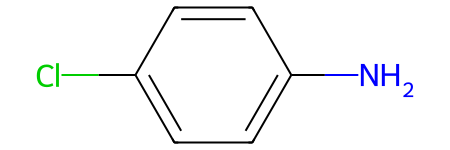

has similarity of 0.756 with
Nc1ccccc1


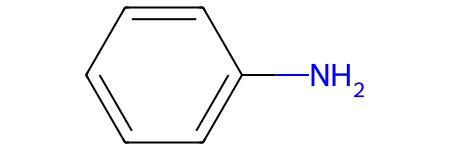

****************************************************************************************
Smiles: Cc1cccc(O)c1


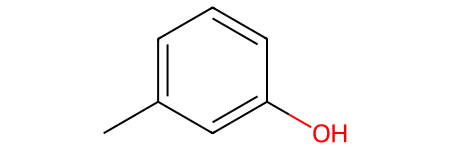

has similarity of 0.978 with
Cc1ccc(O)cc1


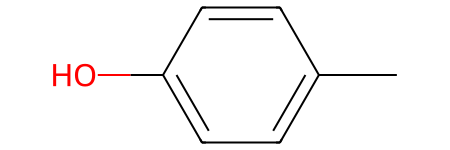

has similarity of 0.789 with
Cc1cc(C)cc(O)c1


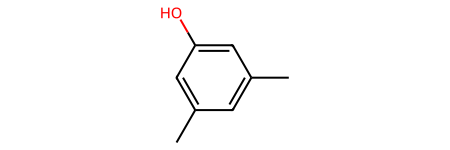

****************************************************************************************
Smiles: O=N(=O)c1ccc(cc1)N(=O)=O


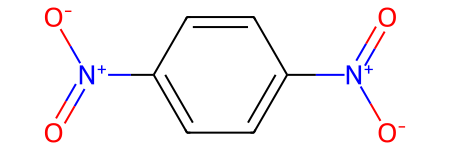

has similarity of 0.988 with
O=N(=O)c1cccc(c1)N(=O)=O


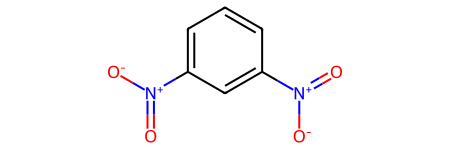

has similarity of 0.920 with
O=N(=O)c1ccccc1N(=O)=O


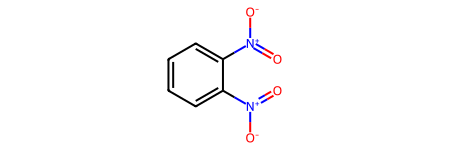

****************************************************************************************
Smiles: C/C=C/C=O


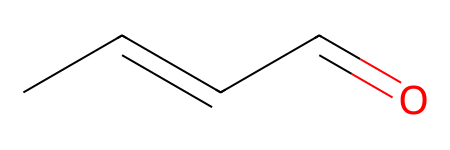

has similarity of 1.000 with
CC=CC=O


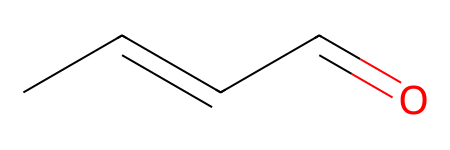

has similarity of 0.429 with
CC/C=C\C


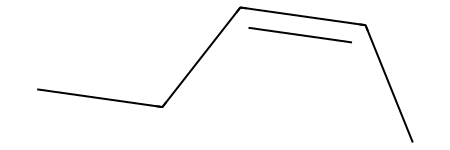

****************************************************************************************
Smiles: Clc1cccc(c1Cl)c2cccc(Cl)c2Cl


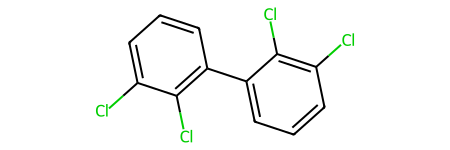

has similarity of 0.979 with
Clc1ccc(Cl)c(c1)c2cccc(Cl)c2Cl


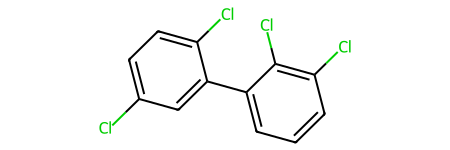

has similarity of 0.869 with
Clc1cccc(Cl)c1c2c(Cl)cccc2Cl


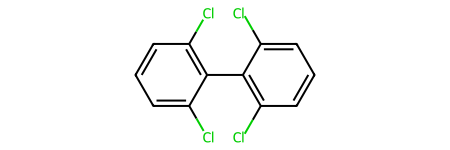

****************************************************************************************
Smiles: c1(O)c(C)ccc(C(C)C)c1


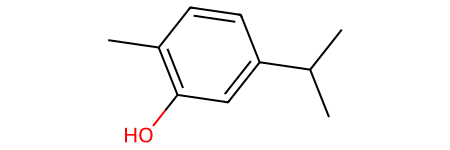

has similarity of 0.974 with
CC(C)c1ccc(C)cc1O


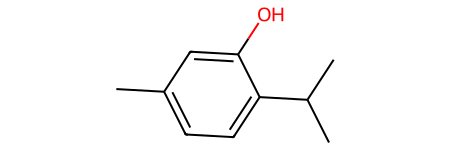

has similarity of 0.816 with
CC(C)c1ccc(C)cc1


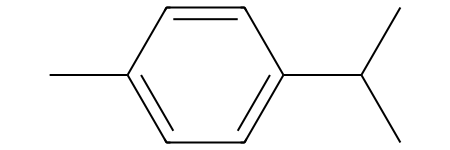

****************************************************************************************
Smiles: Nc1ccc(cc1)N(=O)=O


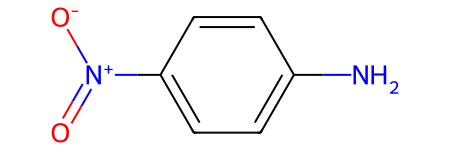

has similarity of 0.984 with
Nc1cccc(c1)N(=O)=O


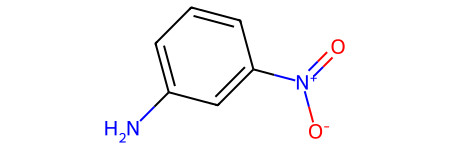

has similarity of 0.765 with
O=N(=O)c1cccc(c1)N(=O)=O


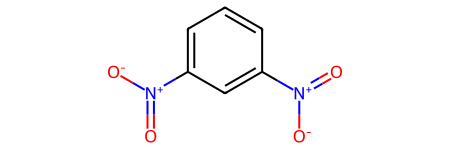

****************************************************************************************
Smiles: CC(=O)OC3CCC4C2CCC1=CC(=O)CCC1(C)C2CCC34C


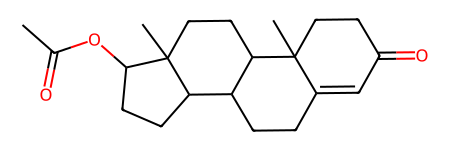

has similarity of 0.980 with
CCC(=O)OC3CCC4C2CCC1=CC(=O)CCC1(C)C2CCC34C


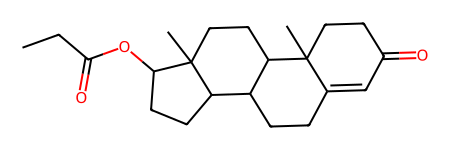

has similarity of 0.926 with
CC12CCC3C(CCC4=CC(=O)CCC34C)C2CCC1O


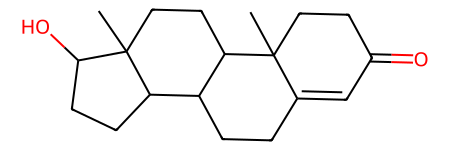

****************************************************************************************
Smiles: CCCC1CCCC1


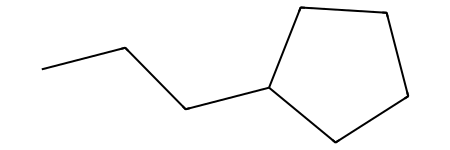

has similarity of 0.976 with
CCC1CCCCC1


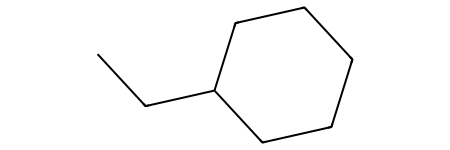

has similarity of 0.854 with
C/C1CCCCC1\C


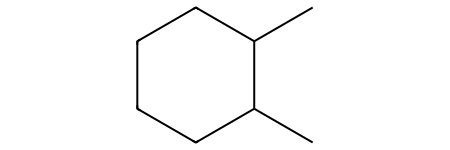

****************************************************************************************
Smiles: Fc1cccc(F)c1


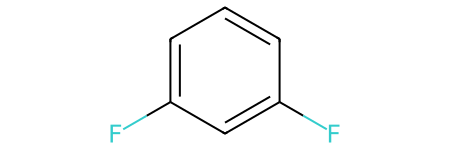

has similarity of 0.978 with
Fc1ccc(F)cc1


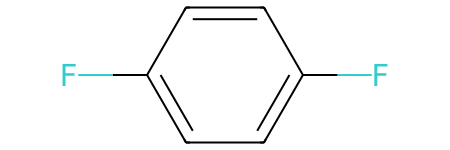

has similarity of 0.607 with
Fc1cccc(Br)c1


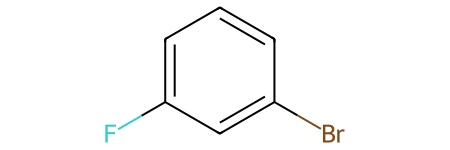

****************************************************************************************
Smiles: c1ccc2cc3c4cccc5cccc(c3cc2c1)c45


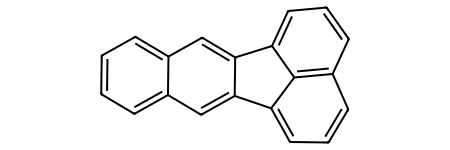

has similarity of 0.976 with
c1ccc2c3c(ccc2c1)c4cccc5cccc3c45


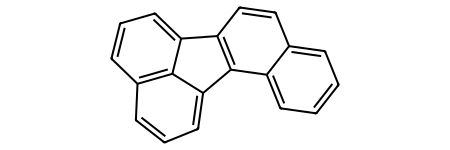

has similarity of 0.540 with
c1ccc2cc3cc4ccccc4cc3cc2c1


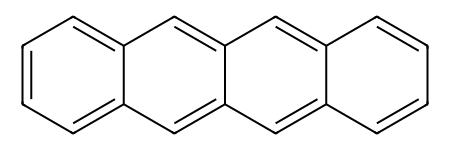

****************************************************************************************
Smiles: Brc1ccc(Br)cc1


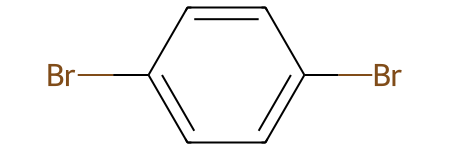

has similarity of 0.978 with
Brc1cccc(Br)c1


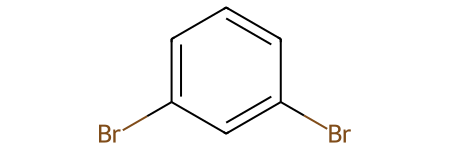

has similarity of 0.936 with
Brc1ccccc1Br


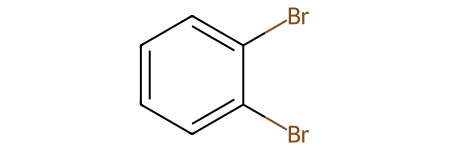

****************************************************************************************
Smiles: Clc1ccc(Cl)cc1


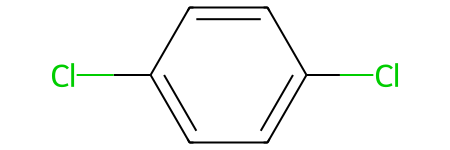

has similarity of 0.978 with
Clc1cccc(Cl)c1


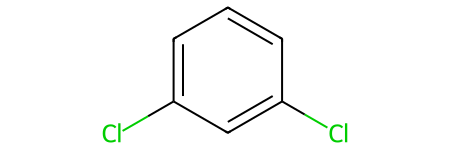

has similarity of 0.772 with
Oc1cc(Cl)cc(Cl)c1


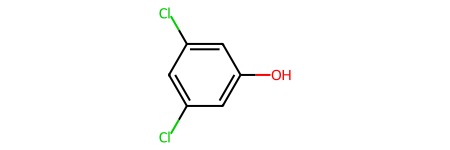

****************************************************************************************
Smiles: Clc1ccc(c(Cl)c1Cl)c2ccc(Cl)c(Cl)c2Cl


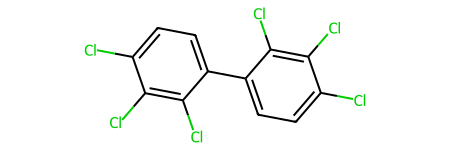

has similarity of 0.976 with
Clc1ccc(c(Cl)c1)c2cc(Cl)c(Cl)c(Cl)c2Cl


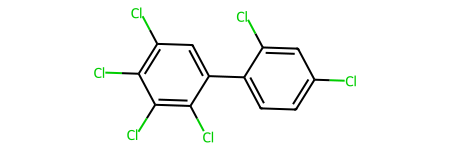

has similarity of 0.976 with
Clc1ccc(Cl)c(c1)c2cc(Cl)c(Cl)c(Cl)c2Cl


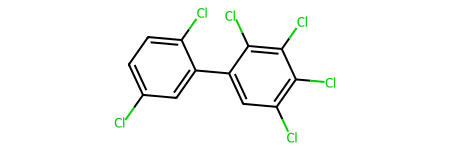

****************************************************************************************
Smiles: O=C1N(COC(=O)CC)C(=O)C(N1)(c2ccccc2)c3ccccc3


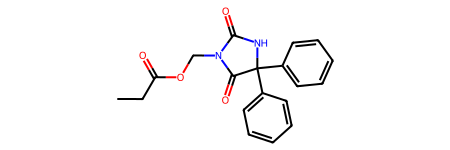

has similarity of 0.980 with
O=C1N(COC(=O)CCC)C(=O)C(N1)(c2ccccc2)c3ccccc3


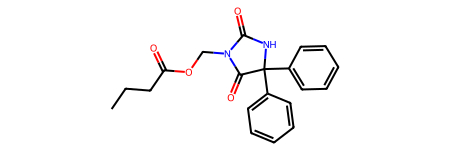

has similarity of 0.566 with
CN(C)C(=O)C(c1ccccc1)c2ccccc2


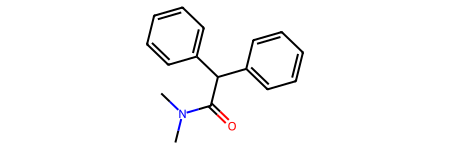

In [12]:
# visualize the smiles that have high similarity
for i in range(similarity_matrix.shape[0]):
    temp_sim_array = similarity_matrix[i, :]
    # find the 2 most similar neighbors
    indices = temp_sim_array.argsort()[-2:][::-1]
    if temp_sim_array[indices[0]] > 0.97:
        print('*'*88)
        smi1 = smiles_list1[i]
        print(f'Smiles: {smi1}')
        display(Chem.MolFromSmiles(smi1))
        for idx in indices:
            print(f'has similarity of {temp_sim_array[idx]:.3f} with')
            smi2 = smiles_list2[idx]
            print(smi2)
            display(Chem.MolFromSmiles(smi2))